# Machine Learning - 2

While preparing codes, I have utilized following sources:

https://jakevdp.github.io/PythonDataScienceHandbook/

https://app.datacamp.com/learn/courses/introduction-to-deep-learning-in-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Naive Bayes Classification

In [2]:
#Gaussian Naive Bayes Classifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [3]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 3


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [5]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.11      0.20        18
           2       0.45      1.00      0.62        13

    accuracy                           0.64        45
   macro avg       0.82      0.70      0.61        45
weighted avg       0.84      0.64      0.57        45



## Support Vector Machines

In [169]:
from sklearn import svm

#Define your data
X, y = load_iris(return_X_y=True)

SVC = svm.SVC(kernel='linear') #Specify kernel as 'RBF' or 'linear' if needed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

SVC.fit(X_train, y_train)

#For regression analysis use: SVR = svm.SVR()

y_pred = SVC.predict(X_test)

In [170]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 0


The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

Increasing C have a similar effect with increasing number of neighbors in KNN classifiers. It provides better fitting, but introduces a risk of overfitting.

In [171]:
y_pred  = svm.SVC(kernel='linear', C=1E6).fit(X_train, y_train).predict(X_test)

In [172]:
y_pred  = svm.SVC(kernel='rbf', C=1E10).fit(X_train, y_train).predict(X_test)

In [173]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 3


In [174]:
len(SVC.support_vectors_)

22

In [175]:
SVC.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.7, 5.1, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3. , 4.8, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.94      0.89      0.91        18
           2       0.92      0.92      0.92        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



In [159]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

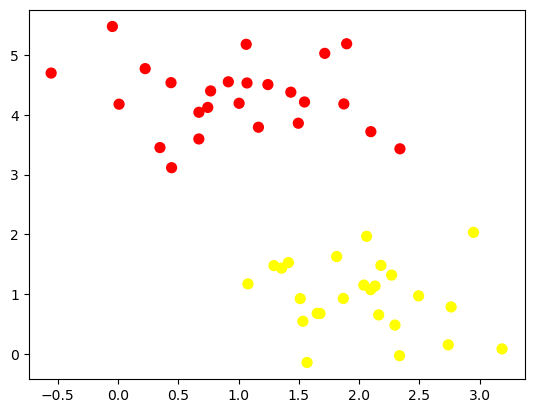

In [160]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

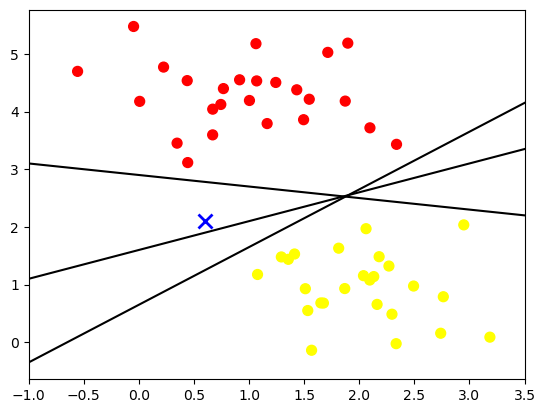

In [167]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In SVM, however, we work in a deterministic manner, first detecting parallel support vectors, then drawing the classifier as a result of our Machine Learning model.

In [16]:
SVC = svm.SVC(kernel='linear', C=1E10)
SVC.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

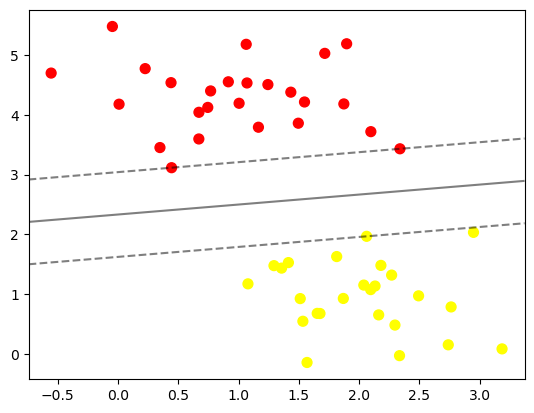

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(SVC)

## Decision trees and random forests

In [19]:
#from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

In [21]:
print('Depth of the Decision Tree :', clf.get_depth())

Depth of the Decision Tree : 4


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



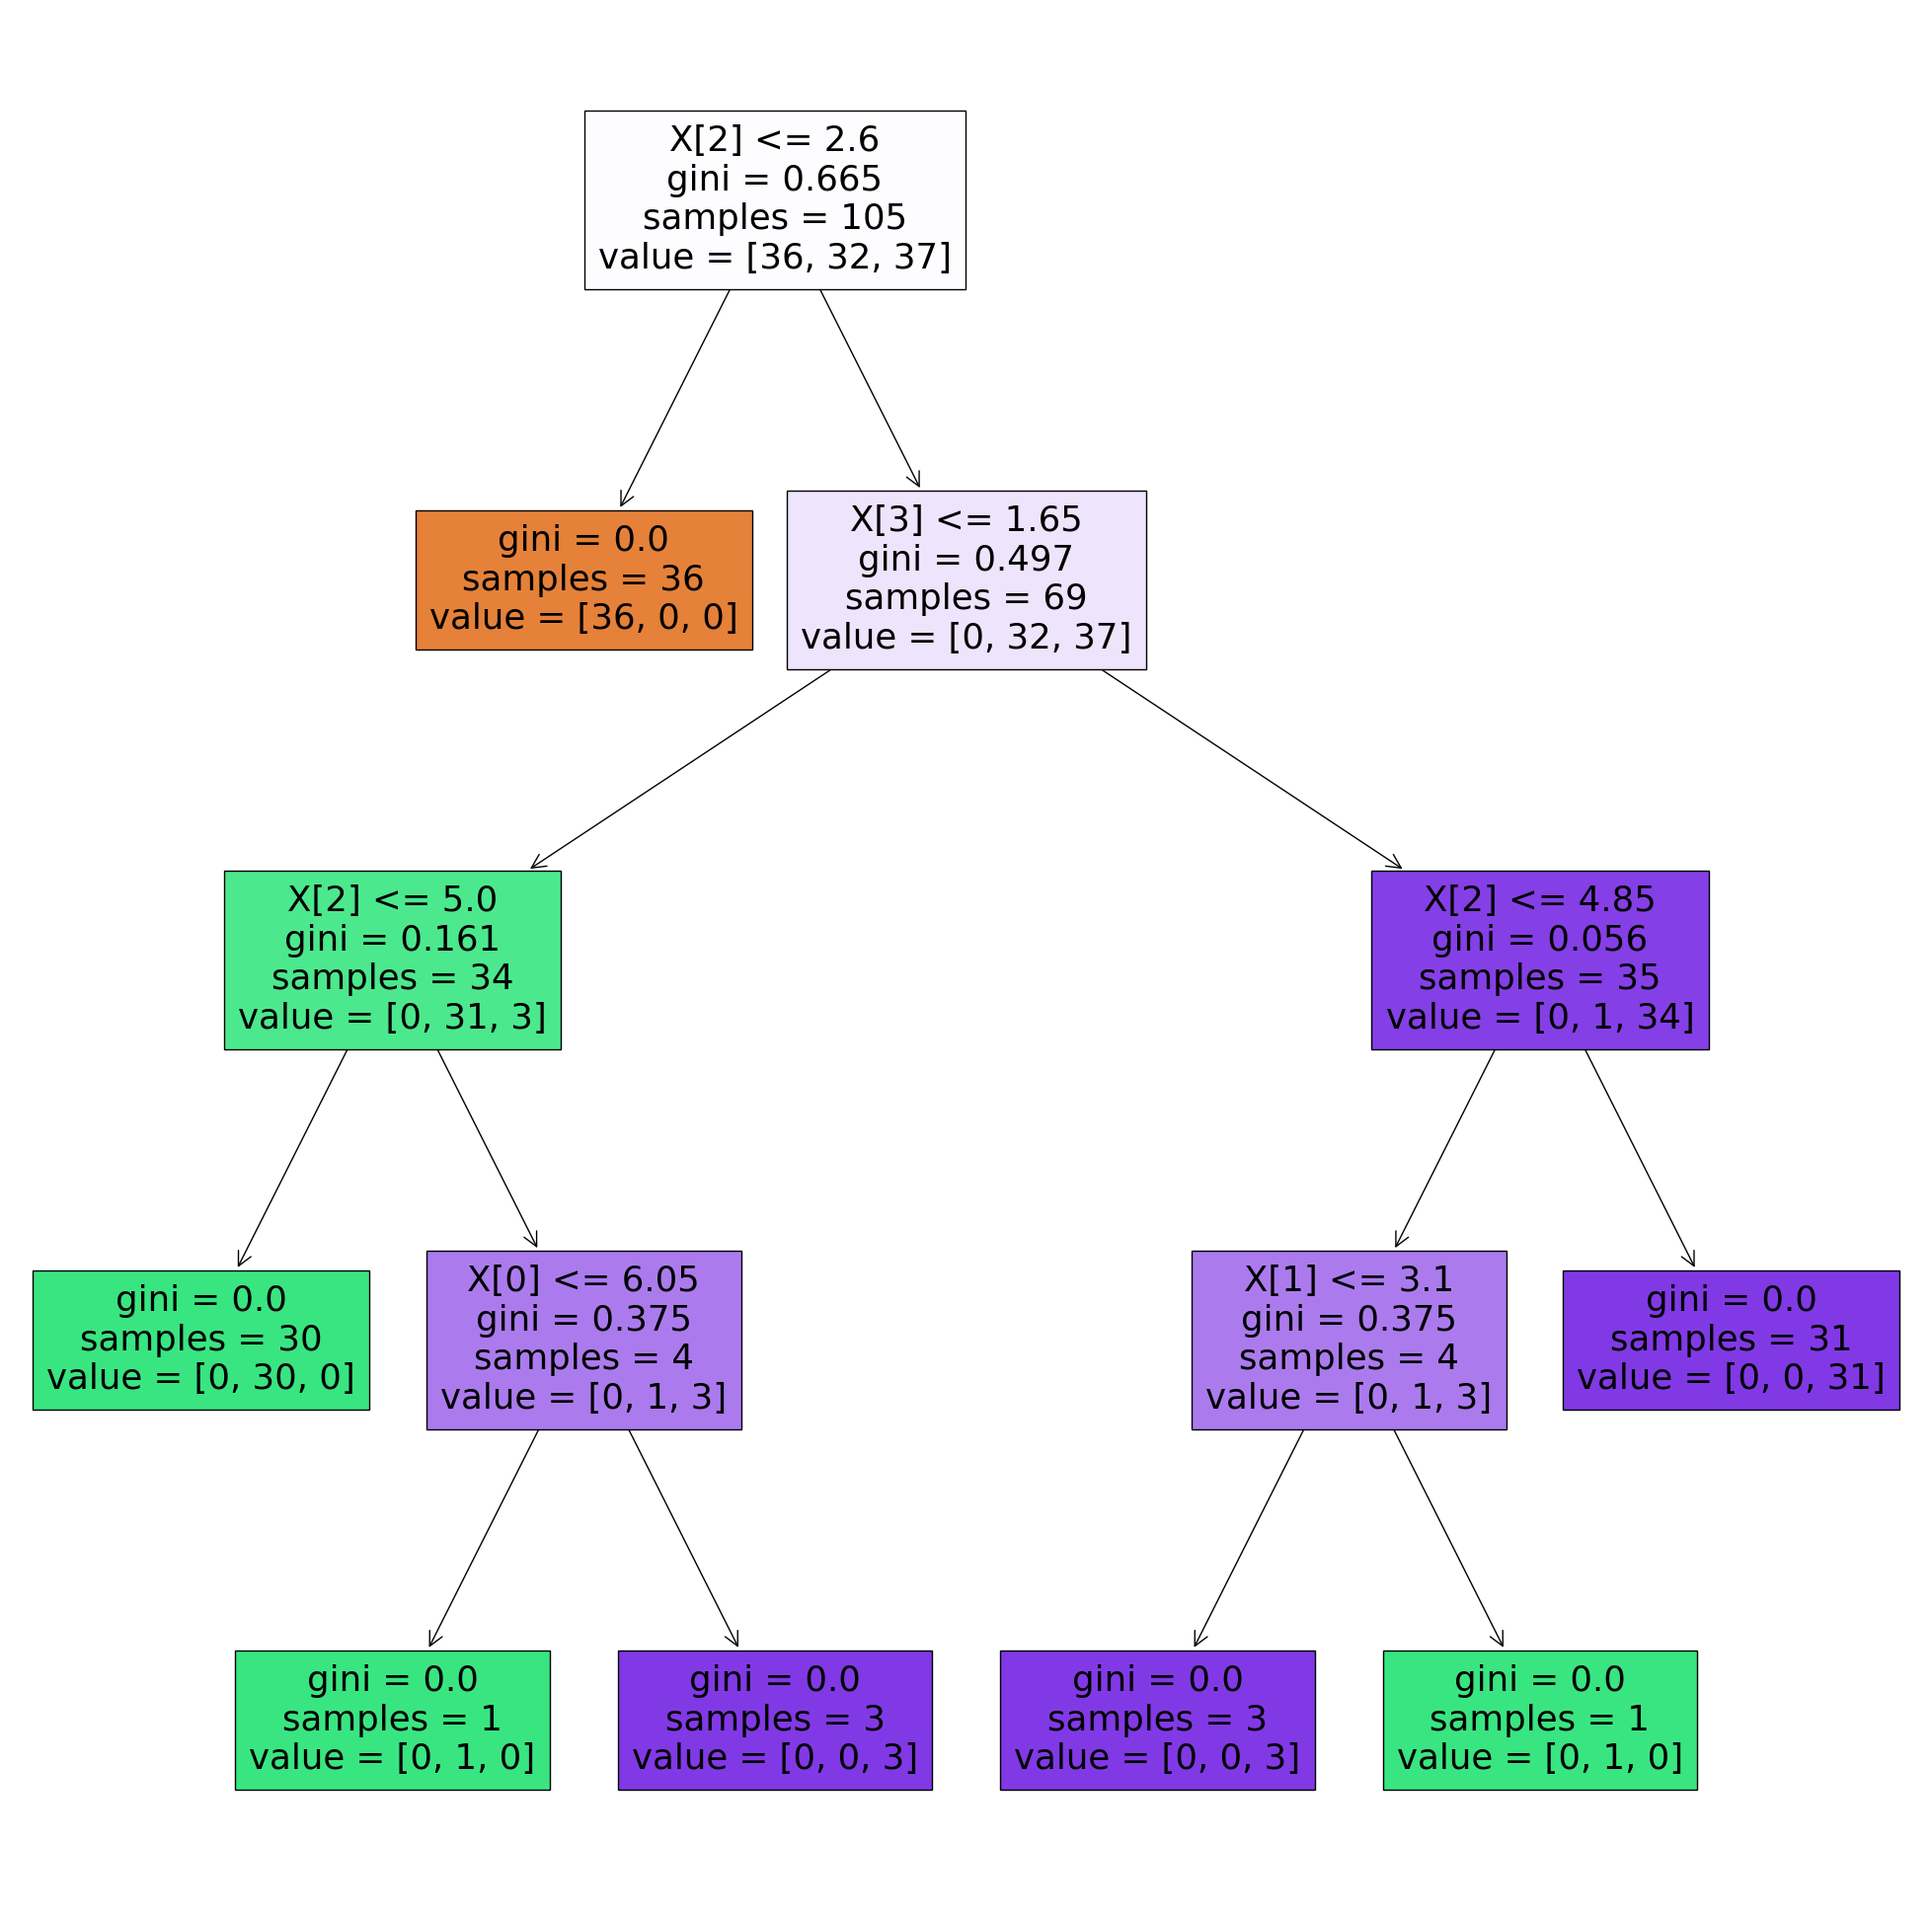

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(clf, filled=True)
plt.show()

In [24]:
X = X[:,0:2] #Let's assume X has two features, take the first two, and ignore the rest.

In [25]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\user\AppData\Local\Temp\ipykernel_5064\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


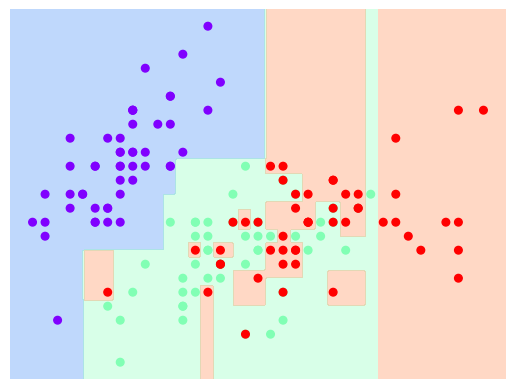

In [27]:
visualize_classifier(tree.DecisionTreeClassifier(criterion='gini'), X, y)

C:\Users\user\AppData\Local\Temp\ipykernel_5064\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


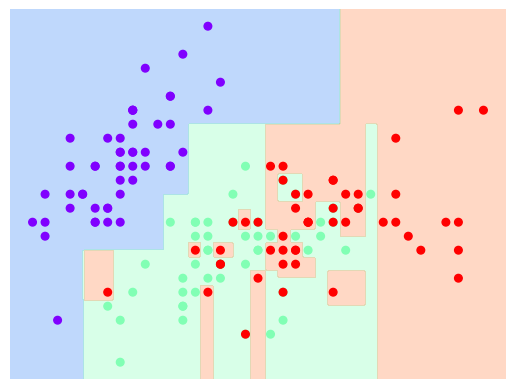

In [29]:
visualize_classifier(tree.DecisionTreeClassifier(criterion='entropy'), X, y)

#### Randomized Search with Decision Trees

Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

min_samples_leaf: The minimum number of samples required to be at a leaf node

max_features: It helps to find the number of features to take into account in order to make the best split.

In [30]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3}
Best score is 0.9428571428571428


C:\Users\user\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\user\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() #number of trees: n_estimators=?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Number of Trees used : ', clf.n_estimators)

Number of Trees used :  100


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.62      0.76      0.68        17
           2       0.67      0.53      0.59        15

    accuracy                           0.73        45
   macro avg       0.76      0.74      0.75        45
weighted avg       0.74      0.73      0.73        45



C:\Users\user\AppData\Local\Temp\ipykernel_5064\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


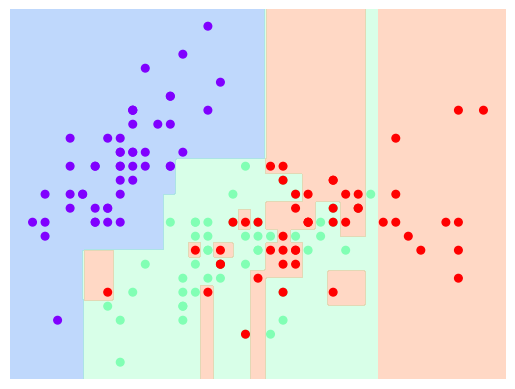

In [33]:
visualize_classifier(DecisionTreeClassifier(criterion='gini'), X, y)

C:\Users\user\AppData\Local\Temp\ipykernel_5064\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


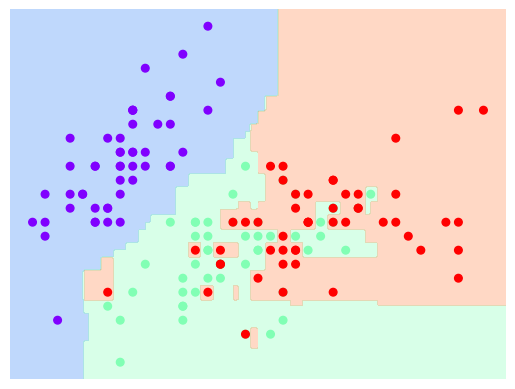

In [34]:
visualize_classifier(RandomForestClassifier(n_estimators=100, random_state=0), X, y)

## Principal Component Analysis

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

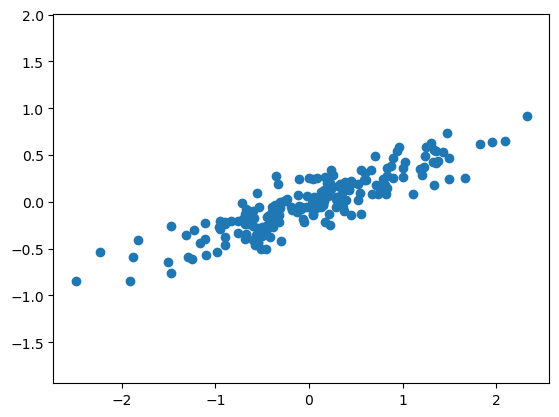

In [183]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T 
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [184]:
X.shape

(200, 2)

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [186]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [187]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

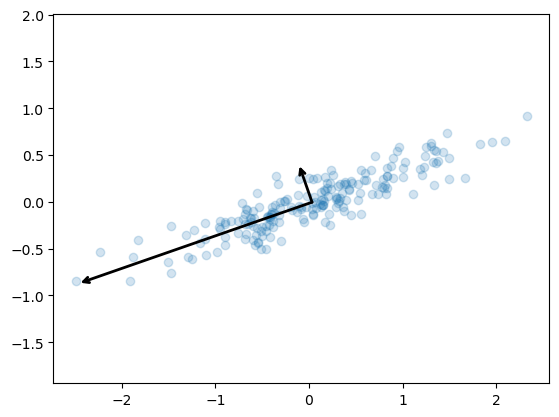

In [188]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 3
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [189]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

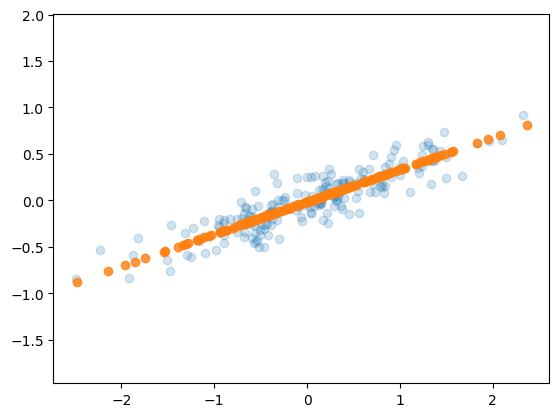

In [190]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [191]:
X, y = load_iris(return_X_y=True)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (150, 4)
transformed shape: (150, 2)


(4.0099189763269685, 8.098983407966273, 1.88, 4.5200000000000005)

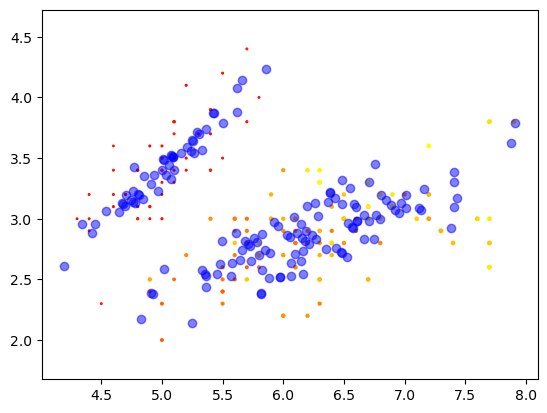

In [203]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], alpha=1, cmap='autumn')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5, c='blue')
plt.axis('equal')

In [204]:
pca.components_ #in terms of older dimensions

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [205]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [206]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0, 0.5, 'cumulative explained variance')

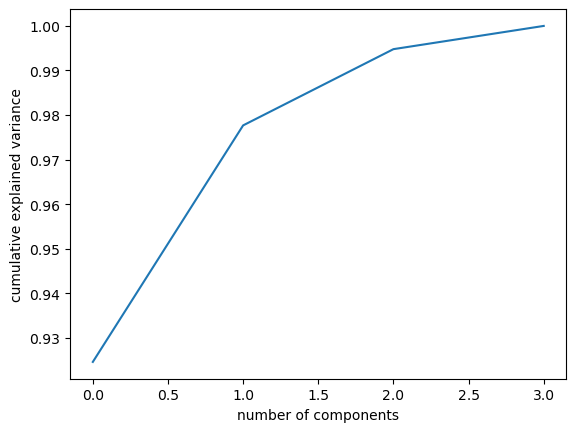

In [207]:
pca = PCA() #default is the number of features
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Focusing only one single dimension provides 98% of total variation in X.

## Neural Networks and Deep Learning

In [223]:
iris = sns.load_dataset('iris')

In [224]:
#Assign data from first four columns to X variable
X = iris.iloc[:, 0:4]

#Assign data from first fifth columns to y variable
y = iris.select_dtypes(include=[object])

In [225]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [234]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000) # default activation fnc. is relu (rectified linear unit), alternatives: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 10 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'relu' activation function is used with 'adam' cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In [235]:
predictions = mlp.predict(X_test)

In [236]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Neural Networks with Keras

In [57]:
# pip install keras
# pip install tensorflow

In [237]:
# Let's use twitter_data.

data = pd.read_json('C:/Users/user/Desktop/Advanced Data Analysis with Python 9.9.22/Datasets/twitter_data_ML.json')

y = data['rank_dummy']
X = data[['age_group', 'female','followers_count', 
             'emoji_n', 'tweet_length', 'tweet_unique_length', 
              'n_pos_sent']]

In [209]:
X

,age_group,female,followers_count,emoji_n,tweet_length,tweet_unique_length,n_pos_sent
0,2,0,222,0.2,51.6,15.8,5
1,3,0,145,0.0,67.4,19.8,5
2,1,1,58,0.0,48.6,17.4,4
3,2,0,30,0.2,57.6,18.6,4
4,2,1,83,1.2,17.4,9.8,5
...,...,...,...,...,...,...,...
4099,2,1,143,1.0,43.6,16.2,4
4100,2,0,106,0.0,60.0,20.2,5
4101,1,1,128,0.0,100.8,21.8,5
4102,3,0,0,0.0,82.6,17.4,5


In [238]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

In [240]:
X.shape

(4104, 7)

In [239]:
n_cols = X.shape[1]

In [241]:
from keras.utils import to_categorical

y = to_categorical(y)

In [246]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(10, activation='relu', input_shape=(10,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(X, y)

129/129 [==============================] - 1s 2ms/step - loss: 1.1066 - accuracy: 0.5063


In [247]:
# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


In [216]:
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 10)                80        
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 2)                 22        
                                                                 
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________
None


Parameters of each step equal to (prior_nodes + 1) multiplied by later_nodes. So it is the number of weights + one bias for each prior_node.

In [248]:
def get_new_model():

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(7, )))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return (model)

In [250]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(X, y)



Testing model with learning rate: 0.000001



C:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


129/129 [==============================] - 2s 5ms/step - loss: 44.4038


Testing model with learning rate: 0.010000



C:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


129/129 [==============================] - 1s 4ms/step - loss: 1.5503


Testing model with learning rate: 1.000000



C:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


129/129 [==============================] - 1s 4ms/step - loss: 6.1007


In [219]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=5)

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

In [220]:
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(lr=.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30


C:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


90/90 [==============================] - 1s 4ms/step - loss: 4.9284 - accuracy: 0.5073 - val_loss: 0.6956 - val_accuracy: 0.5203
Epoch 2/30
90/90 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5188 - val_loss: 0.7056 - val_accuracy: 0.4919
Epoch 3/30
90/90 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5122 - val_loss: 0.7078 - val_accuracy: 0.4943
Epoch 4/30
90/90 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5171 - val_loss: 0.7113 - val_accuracy: 0.4976
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5111 - val_loss: 0.6940 - val_accuracy: 0.5057
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5258 - val_loss: 0.6967 - val_accuracy: 0.5024
Epoch 7/30
90/90 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5198 - val_loss: 0.6955 - val_accuracy: 0.4976
Epoch 8/30
90/90 [=============

In [221]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X, y)

# Calculate predictions: predictions
y_pred = model.predict(X)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = y_pred[:,1]

# print predicted_prob_true
print(predicted_prob_true)

129/129 [==============================] - 0s 1ms/step
[0.5022676  0.5022676  0.5022676  ... 0.5022676  0.27158445 0.5022676 ]


### Predicting land invasions

In [132]:
data_br = pd.read_stata('C:/Users/user/Desktop/Advanced Data Analysis with Python 9.9.22/Datasets/Brazil MST data 2005-2006.dta')
data_br = data_br.dropna(axis=0).reset_index()

In [133]:
data_br_2004 = data_br[data_br['year']==2004].reset_index()
data_br_2005 = data_br[data_br['year']==2005].reset_index()

In [134]:
data_br_2005_inv = data_br[data_br['year']==2005][['invasions_count','invasions_dum','ibgecode']].reset_index()
data_br_2006_inv = data_br[data_br['year']==2006][['invasions_count','invasions_dum','ibgecode']].reset_index()

In [135]:
data_br_2005_inv['invasions_count_2005'] = data_br_2005_inv['invasions_count']
data_br_2006_inv['invasions_count_2006'] = data_br_2006_inv['invasions_count']
data_br_2005_inv['invasions_dum_2005'] = data_br_2005_inv['invasions_dum']
data_br_2006_inv['invasions_dum_2006'] = data_br_2006_inv['invasions_dum']

In [136]:
data_br_2004 = pd.merge(data_br_2004, data_br_2005_inv, how='left', on='ibgecode').dropna(axis=0).reset_index()
data_br_2005 = pd.merge(data_br_2005, data_br_2006_inv, how='left', on='ibgecode').dropna(axis=0).reset_index()

In [137]:
pd.get_dummies(data_br_2004['state'])

,AC,AL,AM,AP,BA,CE,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4879,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4880,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
data_br_2004 = pd.merge(data_br_2004, pd.get_dummies(data_br_2004['state']), how='left', left_index=True, right_index=True)
data_br_2005 = pd.merge(data_br_2005, pd.get_dummies(data_br_2005['state']), how='left', left_index=True, right_index=True)

In [139]:
y_train = data_br_2004['invasions_dum_2005']
X_train = data_br_2004[['log_intended_lands1995', 'landgini_extrap', 'ruralpc', 'ln_agriculturalproductivity', 'log_income', 
                 'PT_voteshare', 'reforms_count', 'BF_coverage', 'invasions_count_x',  'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'ES', 'GO',
                 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
                 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']]

y_test = data_br_2005['invasions_dum_2006']
X_test = data_br_2005[['log_intended_lands1995', 'landgini_extrap', 'ruralpc', 'ln_agriculturalproductivity', 'log_income', 
                 'PT_voteshare', 'reforms_count', 'BF_coverage', 'invasions_count_x',  'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'ES', 'GO',
                 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
                 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']]

##### KNN-classifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
y_pred0 = knn.fit(X_train, y_train).predict(X_test)

C:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Naive Bayes

In [141]:
gnb = GaussianNB()
y_pred1 = gnb.fit(X_train, y_train).predict(X_test)

##### Support Vector Machines

In [142]:
SVC = svm.SVC()
SVC.fit(X_train, y_train)
y_pred2 = SVC.predict(X_test)

##### Random Forest

In [143]:
RF_clf = RandomForestClassifier()
RF_clf = RF_clf.fit(X_train, y_train)
y_pred3 = RF_clf.predict(X_test)

##### Neural Networks

In [144]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
y_pred4 = mlp.predict(X_test)

In [145]:
mlp = MLPClassifier(hidden_layer_sizes=(50,100,100,50), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
y_pred5 = mlp.predict(X_test)

#### Same with Keras

In [146]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [147]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [148]:
n_cols = X_train.shape[1]

Keras_NN = Sequential()

Keras_NN.add(Dense(50, activation='relu', input_shape=(n_cols,)))
Keras_NN.add(Dense(100, activation='relu'))
Keras_NN.add(Dense(100, activation='relu'))
Keras_NN.add(Dense(50, activation='relu'))
Keras_NN.add(Dense(2, activation='softmax'))

Keras_NN.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

Keras_NN.fit(X_train, y_train, epochs=30)
y_pred6 = Keras_NN.predict(X_test)

Epoch 1/30


C:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


153/153 [==============================] - 1s 1ms/step - loss: 0.2594 - accuracy: 0.9340
Epoch 2/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9398
Epoch 3/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9402
Epoch 4/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9406
Epoch 5/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9416
Epoch 6/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9406
Epoch 7/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9400
Epoch 8/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9414
Epoch 9/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9422
Epoch 10/30
153/153 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9402
Epoch 11/3

In [149]:
(y_pred6[:,1]>0.5).sum()

53

In [150]:
y_pred6 = (y_pred6[:,1]>0.5).astype(int)

##### Compare F1 macro scores

In [151]:
from sklearn.metrics import f1_score

y_test = data_br_2005['invasions_dum_2006']

f1_score_KNN = round(f1_score(y_test, y_pred0, average='macro'),2)
f1_score_NB = round(f1_score(y_test, y_pred1, average='macro'),2)
f1_score_SVM = round(f1_score(y_test, y_pred2, average='macro'),2)
f1_score_RF = round(f1_score(y_test, y_pred3, average='macro'),2)
f1_score_NN_1 = round(f1_score(y_test, y_pred4, average='macro'),2)
f1_score_NN_2 = round(f1_score(y_test, y_pred5, average='macro'),2)
f1_score_Keras_NN = round(f1_score(y_test, y_pred6, average='macro'),2)


print(f1_score_KNN, f1_score_NB, f1_score_SVM, f1_score_RF, f1_score_NN_1, f1_score_NN_2, f1_score_Keras_NN)

0.57 0.22 0.49 0.63 0.6 0.62 0.58
